In [4]:
from scipy import cluster
import scipy
from scipy import special
import numpy as np
import pandas as pd


In [12]:
!pip install kaggle

# Upload kaggle.json file (Run this cell and select your kaggle.json file through the file picker)
from google.colab import files
uploaded = files.upload()

# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

import kaggle

!kaggle competitions download -c airplane_crash.csv

data = pd.read_csv('airplane_crash.csv', encoding='latin1')
print(data)


Saving kaggle.json to kaggle (2).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
403 - Forbidden - Permission 'competitions.participate' was denied


In [16]:
data.dropna(subset=['Date', 'Location'], inplace=True)
data['Date'] = pd.to_datetime(data['Date'])


In [34]:
from re import S
num_crashes = len(data)
total_fatalities = data['Fatalities Passangers'].sum()
survivors = data['Aboard'] - data['Fatalities']
survival_rate = (data['Survivors'] / data['Aboard']) * 100

print('Number of Crashes:', num_crashes)
print('Number of Survivors: ',survivors)
print('Survival Rate: ', survival_rate)

Number of Crashes: 4994
Number of Survivors:  0       1.0
1       0.0
2       0.0
3       0.0
4       6.0
       ... 
4993    0.0
4994    0.0
4995    0.0
4996    0.0
4997    0.0
Length: 4994, dtype: float64
Survival Rate:  0       50.0
1        0.0
2        0.0
3        0.0
4       30.0
        ... 
4993     0.0
4994     0.0
4995     0.0
4996     0.0
4997     0.0
Length: 4994, dtype: float64


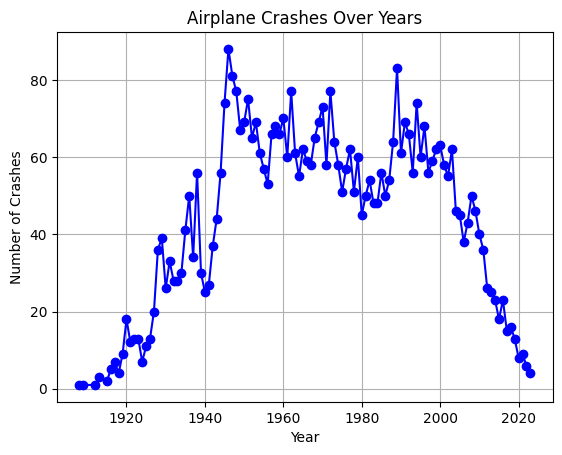

In [36]:
data['Date'] = pd.to_datetime(data['Date'])

crashes_per_year = data['Date'].dt.year.value_counts().sort_index()

import matplotlib.pyplot as plt

crashes_per_year.plot(kind='line', marker='o', color='blue')
plt.title('Airplane Crashes Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()


In [37]:
fatalities_mean = data['Fatalities'].mean()
fatalities_median = data['Fatalities'].median()
fatalities_std = data['Fatalities'].std()

survival_rate_mean = data['Survival Rate'].mean()
survival_rate_median = data['Survival Rate'].median()
survival_rate_std = data['Survival Rate'].std()

print('Fatalities Mean:', fatalities_mean)
print('Fatalities Median:', fatalities_median)
print('Fatalities Standard Deviation:', fatalities_std)
print('Survival Rate Mean:', survival_rate_mean)
print('Survival Rate Median:', survival_rate_median)
print('Survival Rate Standard Deviation:', survival_rate_std)


Fatalities Mean: 22.388086642599276
Fatalities Median: 11.0
Fatalities Standard Deviation: 35.07190508152439
Survival Rate Mean: 18.146741869592013
Survival Rate Median: 0.0
Survival Rate Standard Deviation: 31.178824162952893


In [43]:
from scipy import stats

data['Decade'] = (data['Date'].dt.year // 10) * 10

mean_fatalities_by_decade = data.groupby('Decade')['Fatalities'].mean()

fatalities_1960s = data[data['Date'].dt.year.between(1960, 1969)]['Fatalities']
fatalities_1970s = data[data['Date'].dt.year.between(1970, 1979)]['Fatalities']

t_stat, p_value = stats.ttest_ind(fatalities_1960s, fatalities_1970s, equal_var=False)

print('T-Statistic:', t_stat)
print('P-Value:', p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")



T-Statistic: -2.671953687497852
P-Value: 0.007665696170426232
Reject the null hypothesis.


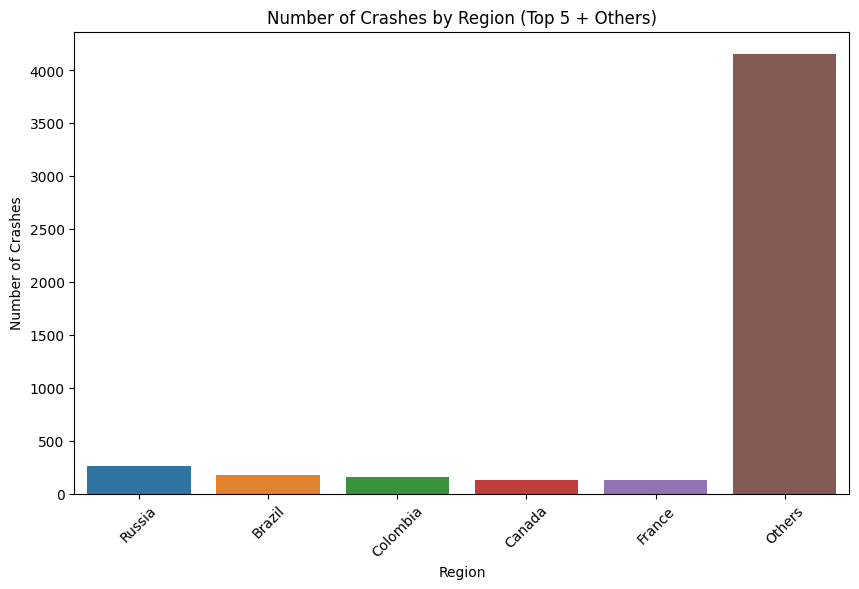

In [52]:
import seaborn as sns
data['Region'] = data['Location'].str.split(',').str[-1].str.strip()

# Calculate number of crashes by region
crashes_by_region = data['Region'].value_counts()

# Keeping top N regions and grouping others as 'Others' category
top_n = 5  # Define the number of top regions to display

top_regions = crashes_by_region.head(top_n)
other_regions_count = crashes_by_region.iloc[top_n:].sum()

# Creating a new 'Others' series
other_series = pd.Series([other_regions_count], index=['Others'])

# Concatenating top regions and 'Others' series
new_crashes_by_region = pd.concat([top_regions, other_series])

plt.figure(figsize=(10, 6))
sns.barplot(x=new_crashes_by_region.index, y=new_crashes_by_region.values)
plt.title('Number of Crashes by Region (Top {} + Others)'.format(top_n))
plt.xlabel('Region')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()

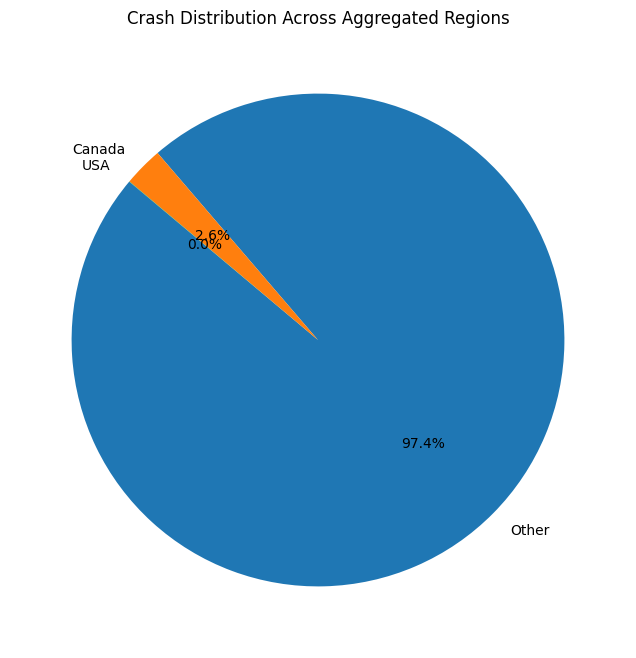

In [51]:
def categorize_region(location):
    if 'USA' in location or 'United States' in location:
        return 'USA'
    elif 'Canada' in location:
        return 'Canada'
    elif 'Europe' in location:
        return 'Europe'
    else:
        return 'Other'
plt.figure(figsize=(8, 8))
crash_distribution = data['Region'].value_counts()
plt.pie(crash_distribution, labels=crash_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Crash Distribution Across Aggregated Regions')
plt.show()
